# base de datos 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [5]:
data = pd.read_csv('day.csv',sep=",")

In [6]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


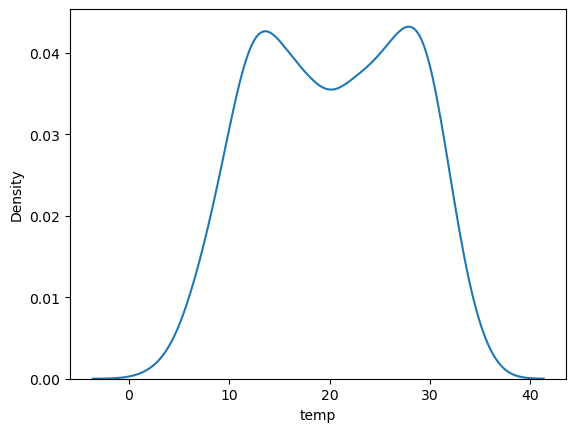

In [7]:
sns.kdeplot(data.temp)
plt.show()

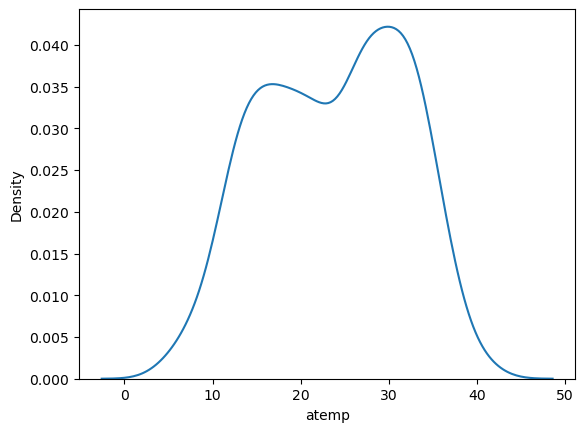

In [8]:
sns.kdeplot(data.atemp)
plt.show()

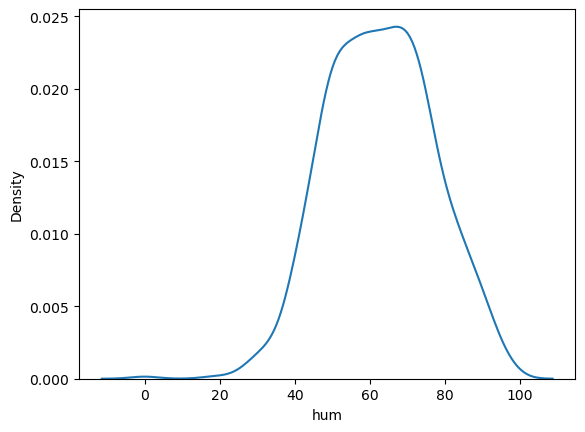

In [9]:
sns.kdeplot(data.hum)
plt.show()

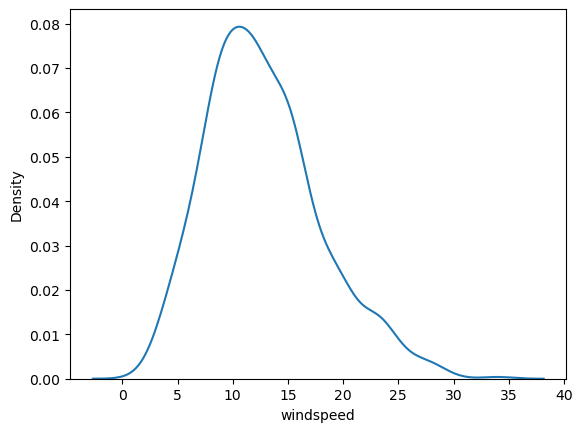

In [10]:
sns.kdeplot(data.windspeed)
plt.show()

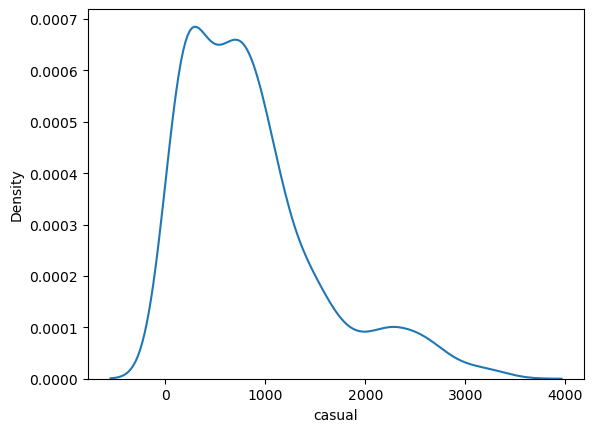

In [11]:
sns.kdeplot(data.casual)
plt.show()

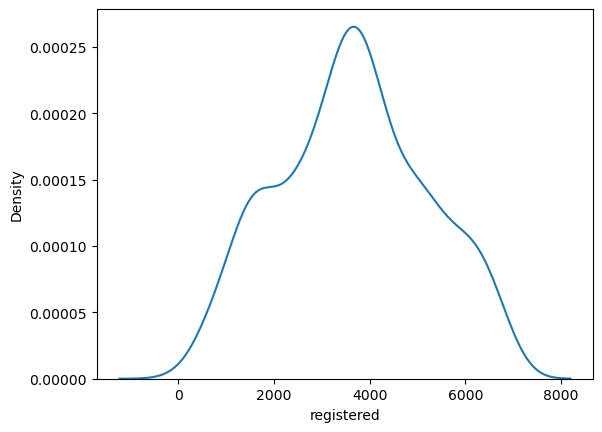

In [12]:
sns.kdeplot(data.registered)
plt.show()

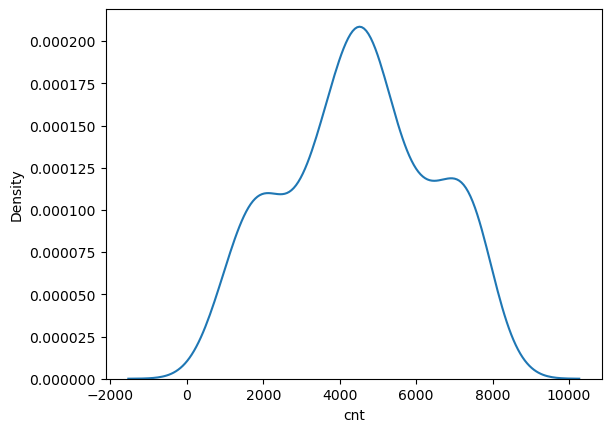

In [13]:
sns.kdeplot(data.cnt)
plt.show()

In [14]:
#Prueba de normalidad (Shapiro)
#Ho: La variable se aproxima a una distribución normal
#Ha: La variable NO se aproxima a una distribución normal

#Si p-value < 5%, se rechaza la hipótesis nula (Ho), 
#al 95% de confianza, la variable NO se aproxima a una distribución normal.

#Si p-value > 5%, no se rechaza la hipótesis nula (Ho), 
#al 95% de confianza, la variable se aproxima a una distribución normal.

In [15]:
#Prueba de normalidad
ss.shapiro(data['temp'])

ShapiroResult(statistic=0.9659262299537659, pvalue=5.307624565548119e-12)

In [16]:
#Prueba de normalidad
ss.shapiro(data['atemp'])

ShapiroResult(statistic=0.9737781286239624, pvalue=3.690037719827899e-10)

In [17]:
#Prueba de normalidad
ss.shapiro(data['hum'])

ShapiroResult(statistic=0.9933744668960571, pvalue=0.0025911659467965364)

In [18]:
#Prueba de normalidad
ss.shapiro(data['windspeed'])

ShapiroResult(statistic=0.971266508102417, pvalue=8.781052274198231e-11)

In [19]:
#Prueba de normalidad
ss.shapiro(data['casual'])

ShapiroResult(statistic=0.885096549987793, pvalue=7.659812252880885e-23)

In [20]:
#Prueba de normalidad
ss.shapiro(data['registered'])

ShapiroResult(statistic=0.9843854308128357, pvalue=5.023125027037167e-07)

In [21]:
#Prueba de normalidad
ss.shapiro(data['cnt'])

ShapiroResult(statistic=0.980247974395752, pvalue=2.31170904640976e-08)

In [22]:
#Si p-value < 5%, se rechaza la hipótesis nula (Ho), 
#al 95% de confianza, la variable NO se aproxima a una distribución normal.

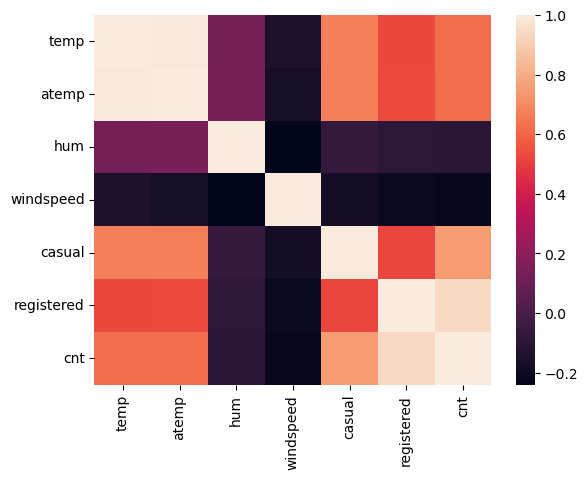

In [23]:
#Heatmap
sns.heatmap(data.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(method = "spearman"))
plt.show()

In [24]:
data.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(method = "spearman")

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.992548,0.131518,-0.147233,0.666942,0.530152,0.621247
atemp,0.992548,1.000000,0.141277,-0.169019,0.667188,0.530907,0.622036
hum,0.131518,0.141277,1.000000,-0.239451,-0.067871,-0.091139,-0.095789
windspeed,-0.147233,-0.169019,-0.239451,1.000000,-0.180660,-0.203073,-0.217423
casual,0.666942,0.667188,-0.067871,-0.180660,1.000000,0.522067,0.752647
registered,0.530152,0.530907,-0.091139,-0.203073,0.522067,1.000000,0.940109
cnt,0.621247,0.622036,-0.095789,-0.217423,0.752647,0.940109,1.000000


In [25]:
#Prueba de Correlación
#Ho: no existe correlación entre las variables
#Ha: existe correlación entre las variables

#Si p-value < 5%, se rechaza la hipótesis nula (Ho), 
#al 95% de confianza, existe correlación entre las variables.

#Si p-value > 5%, no se rechaza la hipótesis nula (Ho), 
#al 95% de confianza, no existe correlación entre las variables.

In [26]:
#Supuesto 1

#linealidad   => cnt vs temp | cnt vs atemp /cnt vs hum | cnt vs windspeed
#cnt vs casual | cnt vs registered  ->  p-value < 5%



#Conclusión1:
#Como p-value < 5%, se rechaza la hipótesis nula (Ho), 
#al 95% de confianza, existe correlación entre las variables:
#Profit vs RyDSpend | Profit vs MarketingSpend

#Al 95% de confianza, se cumple la linealidad entre la variables dependiente (target) vs las variables
#independientes (drivers).


In [27]:
ss.spearmanr(data['cnt'],data['temp'])

SignificanceResult(statistic=0.6212472561105676, pvalue=3.829609864190068e-79)

In [28]:
ss.spearmanr(data['cnt'],data['atemp'])

SignificanceResult(statistic=0.6220361923460125, pvalue=2.137406453767315e-79)

In [29]:
ss.spearmanr(data['cnt'],data['hum'])

SignificanceResult(statistic=-0.09578894822846125, pvalue=0.009608845454336556)

In [30]:
ss.spearmanr(data['cnt'],data['windspeed'])

SignificanceResult(statistic=-0.2174234034073137, pvalue=2.928832649447955e-09)

In [31]:
ss.spearmanr(data['cnt'],data['casual'])

SignificanceResult(statistic=0.7526469998106484, pvalue=2.9235824015691984e-134)

In [32]:
ss.spearmanr(data['cnt'],data['registered'])

SignificanceResult(statistic=0.9401088116195351, pvalue=0.0)

In [33]:
#Supuesto 5

#presencia de Multicolinealidad => temp vs atemp / temp vs hum 
# temp vs windspeed / temp vs casual /temp vs registered / atemp vs hum
# atemp vs windspeed / atemp vs casual /atemp vs registered | hum vs windspeed
# hum vs casual | hum vs registered/windspeed vs casual | windspeed vs registered
# casual vs registered => p-value <5%

#Conclusión 
#Como p-value < 5%, Se rechaza la hipótesis nula (Ho), 
#al 95% de confianza, existe correlación entre las variables independientes (drivers):
#RyDSpend vs MarketingSpend.

#Al 95% de confianza, existe presencia de multicolinealidad entre las variables independientes.

In [34]:
ss.spearmanr(data['temp'],data['atemp'])

SignificanceResult(statistic=0.9925482778131973, pvalue=0.0)

In [35]:
ss.spearmanr(data['temp'],data['hum'])

SignificanceResult(statistic=0.13151840166733278, pvalue=0.00036687972545705323)

In [36]:
ss.spearmanr(data['temp'],data['windspeed'])

SignificanceResult(statistic=-0.1472328078534248, pvalue=6.524952626285934e-05)

In [37]:
ss.spearmanr(data['temp'],data['casual'])

SignificanceResult(statistic=0.6669418517109602, pvalue=4.190297175009492e-95)

In [38]:
ss.spearmanr(data['temp'],data['registered'])

SignificanceResult(statistic=0.5301519193550295, pvalue=3.808090445605765e-54)

In [39]:
ss.spearmanr(data['atemp'],data['hum'])

SignificanceResult(statistic=0.14127653120868822, pvalue=0.00012826584771374552)

In [40]:
ss.spearmanr(data['atemp'],data['windspeed'])

SignificanceResult(statistic=-0.16901908901047158, pvalue=4.392403490863644e-06)

In [41]:
ss.spearmanr(data['atemp'],data['casual'])

SignificanceResult(statistic=0.6671883654658545, pvalue=3.3760787668582844e-95)

In [42]:
ss.spearmanr(data['atemp'],data['registered'])

SignificanceResult(statistic=0.5309066924095713, pvalue=2.534551783116957e-54)

In [43]:
ss.spearmanr(data['hum'],data['windspeed'])

SignificanceResult(statistic=-0.23945120811761697, pvalue=5.597516051911718e-11)

In [44]:
ss.spearmanr(data['hum'],data['casual'])

SignificanceResult(statistic=-0.06787127640017822, pvalue=0.06683944134669154)

In [45]:
ss.spearmanr(data['hum'],data['registered'])

SignificanceResult(statistic=-0.09113865007736267, pvalue=0.01376496138967703)

In [46]:
ss.spearmanr(data['windspeed'],data['casual'])

SignificanceResult(statistic=-0.1806596124595846, pvalue=8.956887996279853e-07)

In [47]:
ss.spearmanr(data['windspeed'],data['registered'])

SignificanceResult(statistic=-0.20307274204049472, pvalue=3.110610766833231e-08)

In [48]:
ss.spearmanr(data['casual'],data['registered'])

SignificanceResult(statistic=0.5220674869685368, pvalue=2.797702190084833e-52)

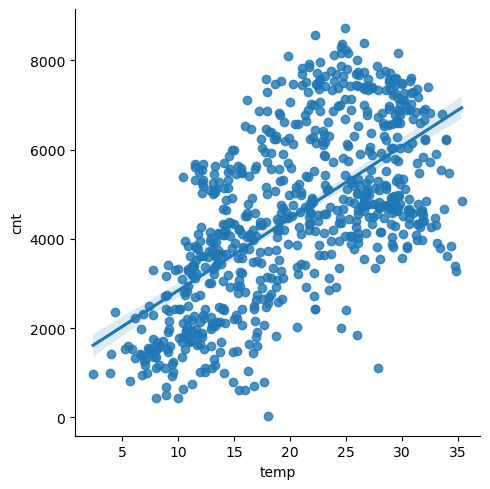

In [49]:
sns.lmplot(x='temp',y='cnt',data=data)
plt.show()

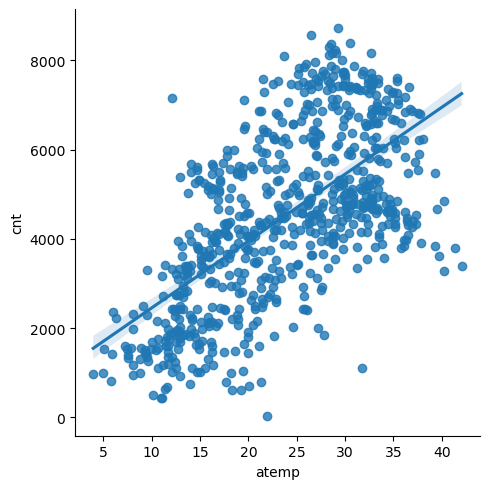

In [50]:
sns.lmplot(x='atemp',y='cnt',data=data)
plt.show()

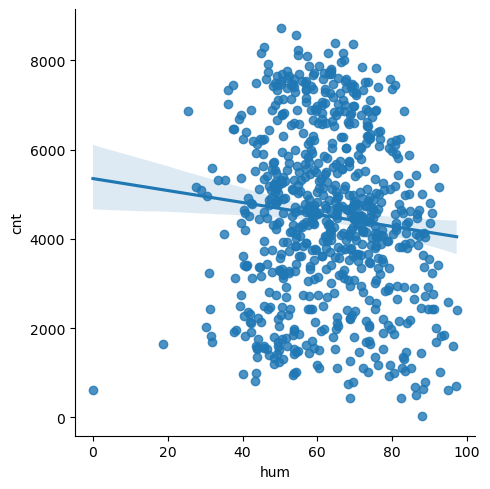

In [51]:
sns.lmplot(x='hum',y='cnt',data=data)
plt.show()

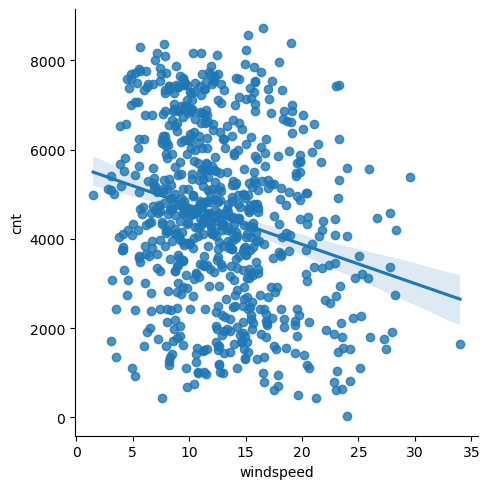

In [52]:
sns.lmplot(x='windspeed',y='cnt',data=data)
plt.show()

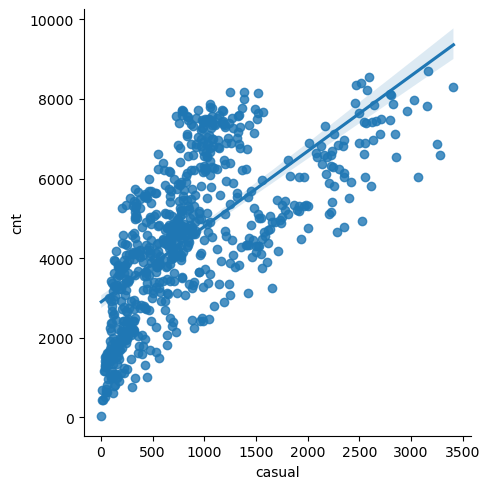

In [53]:
sns.lmplot(x='casual',y='cnt',data=data)
plt.show()

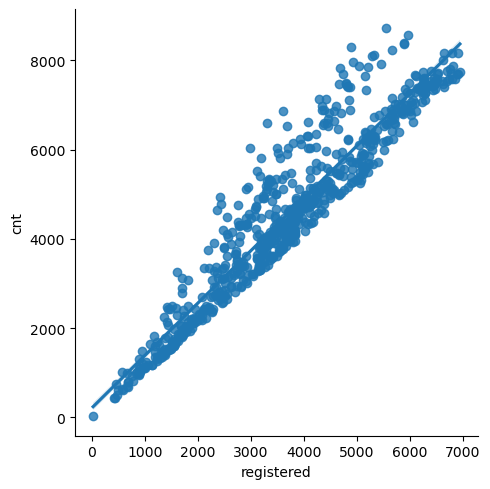

In [54]:
sns.lmplot(x='registered',y='cnt',data=data)
plt.show()

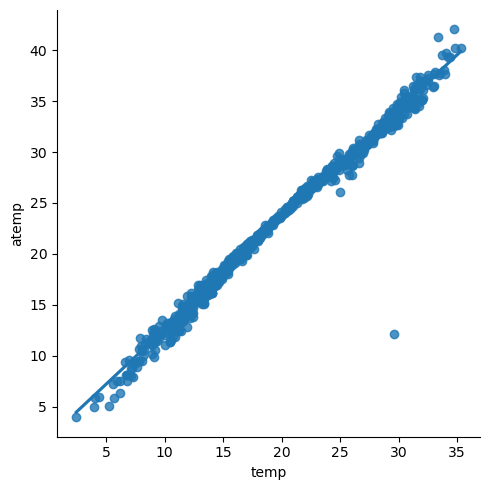

In [55]:
sns.lmplot(x='temp',y='atemp',data=data)
plt.show()

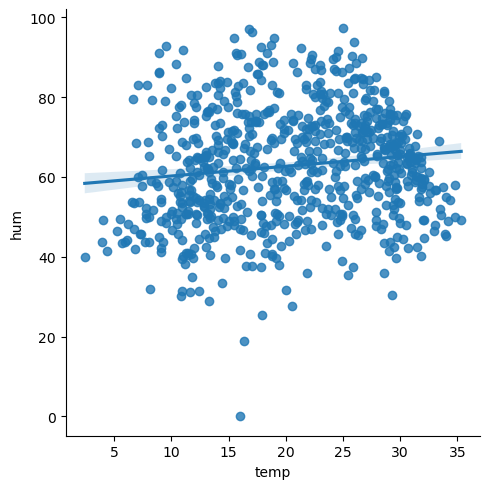

In [56]:
sns.lmplot(x='temp',y='hum',data=data)
plt.show()

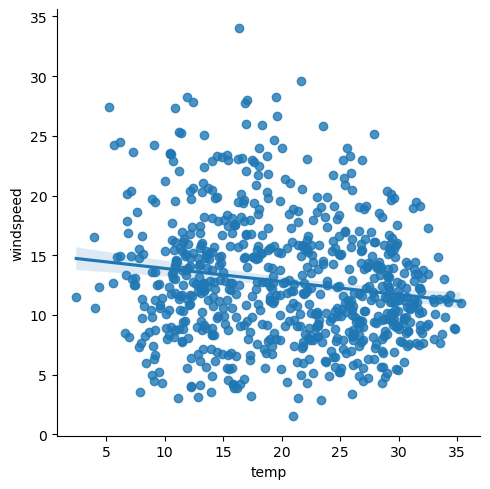

In [57]:
sns.lmplot(x='temp',y='windspeed',data=data)
plt.show()

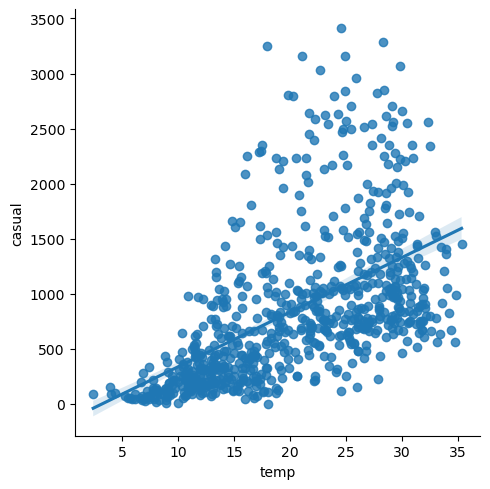

In [58]:
sns.lmplot(x='temp',y='casual',data=data)
plt.show()

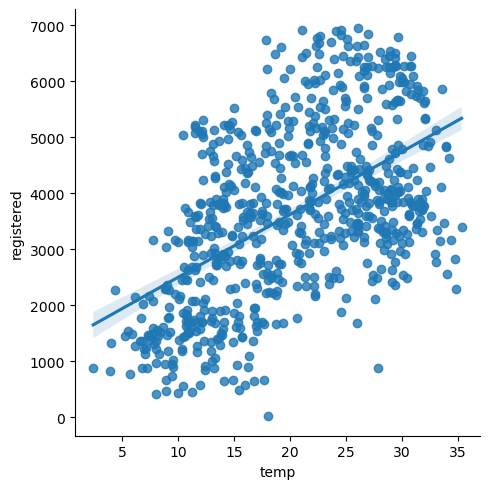

In [59]:
sns.lmplot(x='temp',y='registered',data=data)
plt.show()

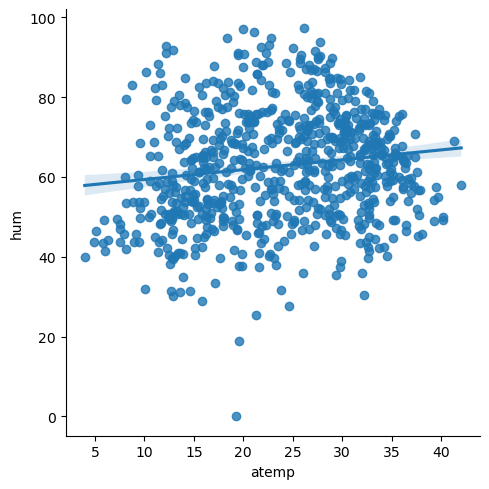

In [60]:
sns.lmplot(x='atemp',y='hum',data=data)
plt.show()

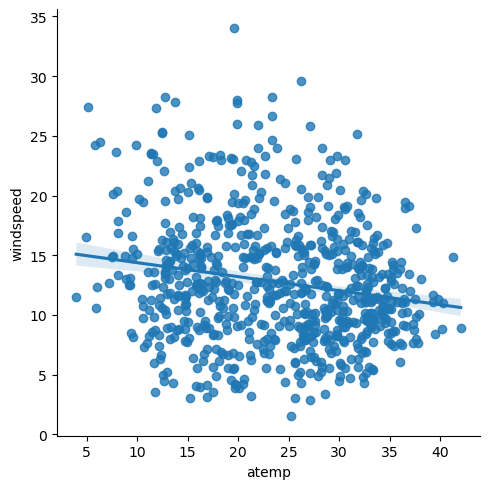

In [61]:
sns.lmplot(x='atemp',y='windspeed',data=data)
plt.show()

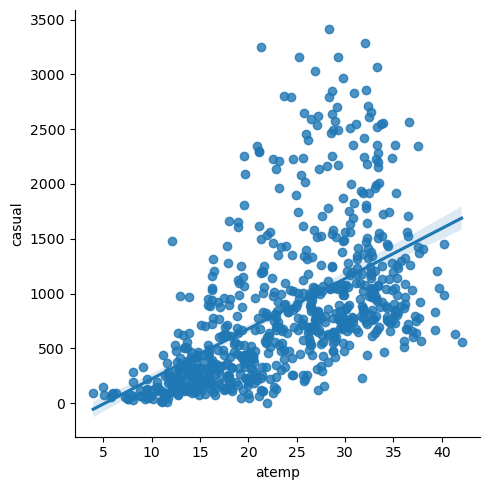

In [62]:
sns.lmplot(x='atemp',y='casual',data=data)
plt.show()

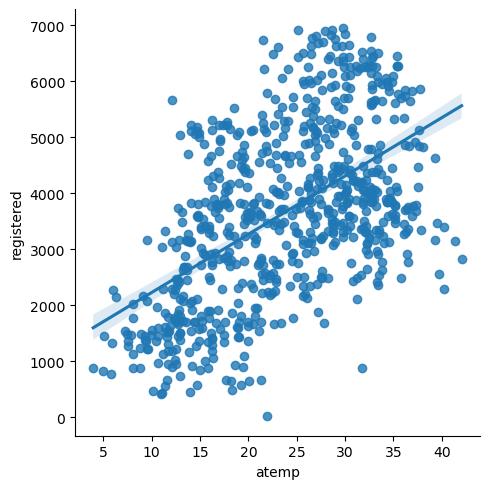

In [63]:
sns.lmplot(x='atemp',y='registered',data=data)
plt.show()

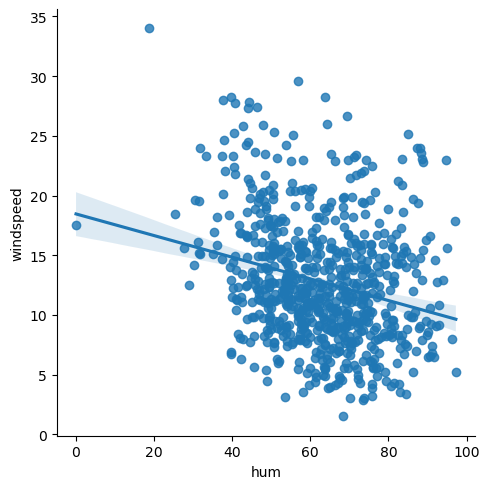

In [64]:
sns.lmplot(x='hum',y='windspeed',data=data)
plt.show()

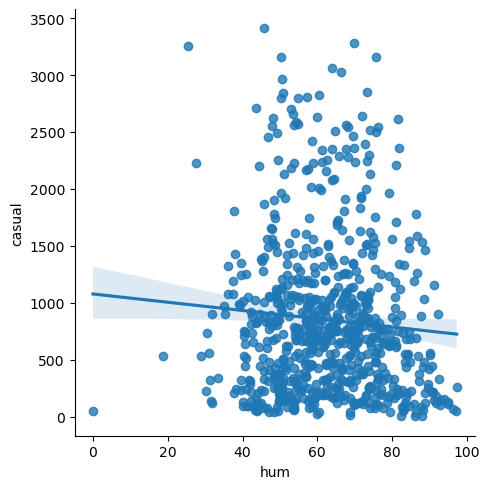

In [65]:
sns.lmplot(x='hum',y='casual',data=data)
plt.show()

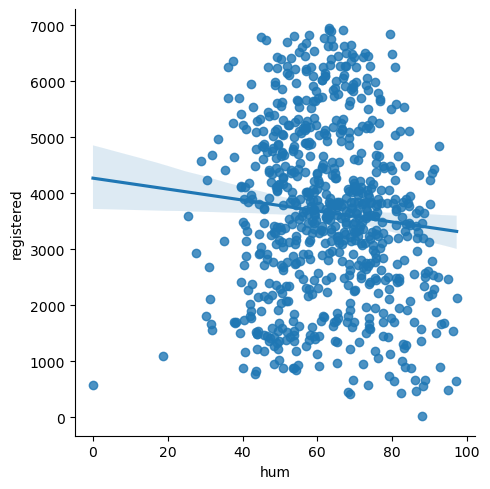

In [66]:
sns.lmplot(x='hum',y='registered',data=data)
plt.show()

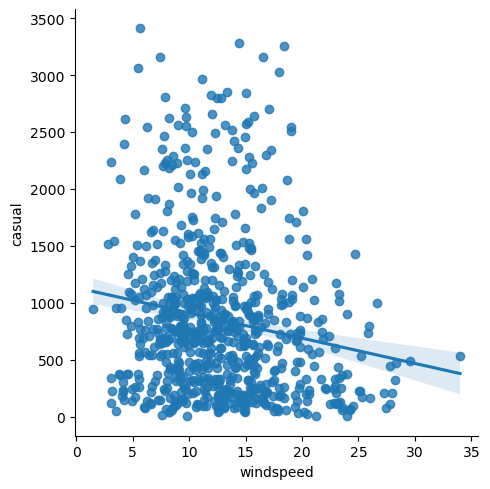

In [67]:
sns.lmplot(x='windspeed',y='casual',data=data)
plt.show()

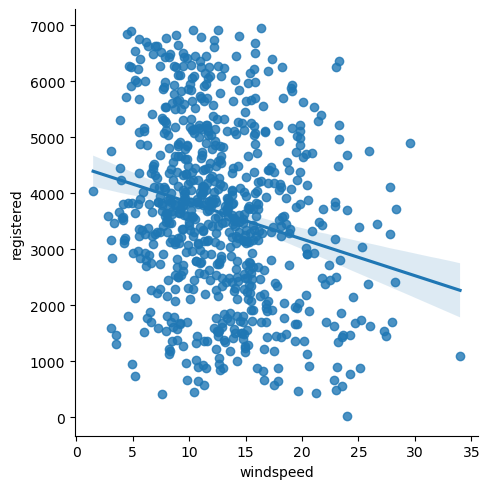

In [68]:
sns.lmplot(x='windspeed',y='registered',data=data)
plt.show()

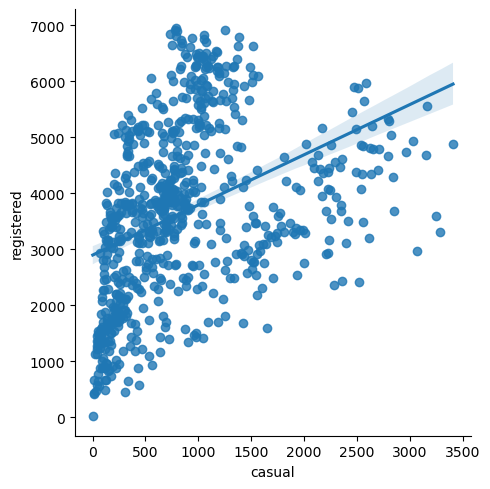

In [69]:
sns.lmplot(x='casual',y='registered',data=data)
plt.show()

In [70]:
#Regresión Lineal
modelo = smf.ols('cnt ~ temp + atemp + hum + windspeed + casual + registered', data=data).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.850e+32
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:46:26   Log-Likelihood:                 18810.
No. Observations:                 730   AIC:                        -3.761e+04
Df Residuals:                     723   BIC:                        -3.757e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.002e-12   4.23e-13    -11.820      0.0

In [71]:
#1.Coeficiente de determinación
# R-squared: 1 => El modelo más adecuado será el que tenga un R-squared cercano 1
# El modelo es capaz de explicar al 100% de la variabilidad observada en las ventas.

# Adj. R-squared: 1 => El modelo más adecuado será el que tenga un R-squared cercano 1
# El modelo es capaz de explicar al 100% de la variabilidad observada en las ventas.

#2.Prueba ANOVA
#Ho: b0=b1=b2=b3=0
#Ha: al menos un bi != 0

#Prob (F-statistic): 0
#=> Como el pvalor < 5%, se rechaza la hipótesis nula (Ho) 
#al 95% de confianza, el modelo es significativo.

#3.Prueba t para coeficientes
#Ho: bi=0
#Ha: bi!=0

##P-value = 0.000 para todos los valores , menos para el segundo y tercer valor que son 0.065 y 0.262 respectivamente
#=> Como el pvalor < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, los coeficientes del modelo son significativos.

#4.Supuestos del modelo

#a.Linealidad 
#=> cnt vs temp | cnt vs atemp /cnt vs hum | cnt vs windspeed
#cnt vs casual | cnt vs registered  ->  p-value => ok

#b.Independencia de errores 
#=> DW = 0.340, como este valor se encuentra entre 1.5 y 2.5 se cumple el supuesto => no esta ok

In [72]:
#c.Homocedasticidad 
#Ho: Las varianzas de los errores son constantes
#Ha: Las varianzas de los errores no son constantes

In [73]:
nombres = ['estadística del multiplicador de Lagrange', 'valor p','valor f', 'valor p f']
test = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
[nombres[1],test[1]]

['valor p', 5.656277721145881e-71]

In [74]:
#=> Pvalor = 5.656277721145881e-71
#=> Como el pvalor < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, Las varianzas de los errores no son constantes -> no esta ok

In [75]:
#d.Normalidad de errores 
#Ho: Los errores se aproximan a un distribución normal
#Ha: Los errores no se aproximan a un distribución normal

#=> Prob(JB) = 0.00904 
#=> Como el pvalor < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, los errores no se aproximan a un distribución normal => no ok

In [76]:
#Coeficientes del modelo
modelo.params

Intercept    -5.002221e-12
temp         -1.136868e-13
atemp         6.394885e-14
hum           3.108624e-14
windspeed     7.815970e-14
casual        1.000000e+00
registered    1.000000e+00
dtype: float64

In [77]:
#Interpretación de coeficientes
#Ventas = -5.002221e-12 + -1.136868e-13temp + 6.394885e-14atemp + 3.108624e-14hum  +7.815970e-14windspeed
# +1.00casual + 1.00registered

#temp => -1.136868e-13, por cada 1000 unidades que se alquilan en el dia ,
#los alquileres de las biciclites disminuyen en un promedio de 0 bicicletas.

#atemp => 6.394885e-14, por cada 1000 unidades que se alquilan ,
#los alquileres de las biciclites aumentan en un promedio de 0 bicicletas.

#hum => 3.108624e-14, por cada 1000 unidades que se alquilan en el dia ,
#los alquileres de las biciclites aumentan en un promedio de 0 bicicletas.

#windspeed => 7.815970e-14, por cada 1000 unidades que se alquilan en el dia ,
#los alquileres de las biciclites aumentan en un promedio de 0 bicicletas.

#casual => 1.00, por cada 1000 unidades que se alquilan en el dia ,
#los alquileres de las biciclites aumentan en un promedio de 1000 bicicletas.

#registered => 1.00, por cada 1000 unidades que se alquilan en el dia ,
#los alquileres de las biciclites aumentan en un promedio de 1000 bicicletas.

In [78]:
#Error del modelo
#A menor valor, el modelo es más adecuado
modelo.mse_resid

2.4613894725896e-24

In [79]:
#Intervalos de confianza para los coeficientes
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
Intercept,-5.833058e-12,-4.171384e-12
temp,-2.343593e-13,6.985594e-15
atemp,-4.797177e-14,1.758695e-13
hum,2.236451e-14,3.980798e-14
windspeed,5.421850e-14,1.021009e-13
casual,1.000000e+00,1.000000e+00
registered,1.000000e+00,1.000000e+00


In [80]:
#Predicciones
predicciones = modelo.predict(exog = data)
predicciones.head(4)

0     985.0
1     801.0
2    1349.0
3    1562.0
dtype: float64